# **3. BIOPYTHON**

Проект Biopython – набор инструментов Python для вычислительной биологии и биоинформатики – используется для визуализации и анализа последовательностей ДНК и РНК. С помощью набора инструментов Biopython также можно выполнять **анализ белковых структур!**

Банк белковых структур (PDB) – единая база данных для изучения и загрузки последовательностей белка. Для работы с PDB был создан специальный файловый формат, естественно, получивший название .pdb. Но по мере того как учёным приходилось анализировать более крупные и сложные белковые структуры, были разработаны другие форматы - CIF и mmCIF. Файл кристаллографической информации CIF (Crystallographic Information File) был разработан для архивирования данных кристаллографического исследования малых молекул. В рамках таких исследований изучается расположение атомов в кристаллических твердых телах. Со временем формат CIF стал использоваться для анализа более крупных молекул (макромолекул, отсюда обозначение mm), получил название mmCIF и в итоге заместил формат PDB.

Отличие PDB от CIF:

- PDB:

    - Старый формат (1971), текстовый, с фиксированной длиной строк(80).
    - Прост в использовании и поддерживается большинством старых инструментов.
    - Ограничен для больших структур и сложных данных.
- CIF:

    - Современный стандарт для хранения структур (особенно кристаллографических).
    - Гибкий формат с табличной структурой (ключ-значение).
    - Лучше подходит для больших молекул и детализированных данных, но менее совместим со старыми программами.

## **1) ВИЗУАЛИЗАЦИЯ ДАННЫХ**

Несмотря на то что в настоящее время общепринятым стандартом является формат mmCIF, многие системы по-прежнему поддерживают файлы старого формата PDB.

Рассмотрим Фитогемагглютинин-L  (PDB ID : 1FAT)– лектин, содержащийся в некоторых бобовых, например в стручковой фасоли.

Для сдачи лабораторной заменим Фитогемагглютинин-L на BCR-ABL тирозинкиназу

Для отображения ipywidgets

In [ ]:
!pip install "ipywidgets>=7,<8"

In [ ]:
!pip install nglview==3.0.8 Bio

In [ ]:
!jupyter-nbextension enable nglview --py --sys-prefix

In [4]:
from google.colab import output
output.enable_custom_widget_manager()

In [5]:
from Bio.PDB import *
import nglview as nv
import ipywidgets

Теперь создадим экземпляр PDBParser Biopython и для создания интерактивной визуализации воспользуемся библиотекой nglview. Мы можем панорамировать, масштабировать и вращать молекулу и даже выводить на экран определённую информацию об атомах.

In [22]:
# path to files
pdb_path = "3oxz.pdb"
cif_path = "3oxz.cif"

In [23]:
pdb_parser = PDBParser()
structure = pdb_parser.get_structure("BCR-ABL", pdb_path)
view = nv.show_biopython(structure)
view

NGLWidget()

Процедура для файлов CIF практически такая же, за тем исключением, что нужно использовать экземпляр MMCIF Parser! Здесь мы визуализируем более крупную белковую структуру 6EBK, или канал paddle chimera Kv1.2-2.1 в липидных нанодисках.

In [24]:
cif_parser = MMCIFParser()
structure = cif_parser.get_structure("BCR-ABL_cif", cif_path)
view = nv.show_biopython(structure)
view

NGLWidget()

## **2) ДОСТУП К ИНФОРМАЦИИ О БЕЛКОВОЙ СТРУКТУРЕ**

**Самый быстрый способ доступа** к информации о белковой структуре – **через заголовок**, словарь метаданных, доступный как в формате PDB, так и в формате CIF.

In [25]:
mmcif_dict = MMCIF2Dict(cif_path)
len(mmcif_dict)

646

В результате создаётся большой словарь информации о белковой структуре, в том числе цитата, определяющая последовательность белка, информацию о структуре, расположениях и углах атомов, а также химический состав. Как видите, словарь состоит из 646 позиций.

**Одна из самых важных частей** анализируемой информации – это **последовательность остатков** белка или полипептида (аминокислот). Поскольку белки могут состоять из нескольких полипептидов, для понимания исследуемого уровня организации мы используем структурный подход. От общей структуры – до отдельных атомов.

Объект Structure в нашем файле построен в архитектуре SMCRA (СМЦОА) в соответствии со схемой “родитель – дочерний элемент”:
- **С**труктура состоит из моделей.

- **М**одель состоит из цепочек.

- **Ц**епочка состоит из остатков (аминокислот).

- **О**статок состоит из **А**томов.

Для получения последовательностей остатков белка существует множество способов разбора метаданных структуры. Рассмотрим три варианта:

In [34]:
residues = list(next(structure.get_models()).get_residues())
print(len(residues))

358


In [41]:
# .get_residues() method in a loop
for model in structure:
    for i, residue in enumerate(model.get_residues()):
        if i < 11:
            print(residue)
# .get_residues() as a generator object
residues = structure.get_residues()
[item for item in residues]
# .unfold_entities - keyword for each level of the SMCRA structure
Selection.unfold_entities(structure, "R")[:10] # R is for residues

<Residue GLY het=  resseq=228 icode= >
<Residue SER het=  resseq=229 icode= >
<Residue PRO het=  resseq=230 icode= >
<Residue ASN het=  resseq=231 icode= >
<Residue TYR het=  resseq=232 icode= >
<Residue ASP het=  resseq=233 icode= >
<Residue LYS het=  resseq=234 icode= >
<Residue TRP het=  resseq=235 icode= >
<Residue GLU het=  resseq=236 icode= >
<Residue MET het=  resseq=237 icode= >
<Residue GLU het=  resseq=238 icode= >


[<Residue GLY het=  resseq=228 icode= >,
 <Residue SER het=  resseq=229 icode= >,
 <Residue PRO het=  resseq=230 icode= >,
 <Residue ASN het=  resseq=231 icode= >,
 <Residue TYR het=  resseq=232 icode= >,
 <Residue ASP het=  resseq=233 icode= >,
 <Residue LYS het=  resseq=234 icode= >,
 <Residue TRP het=  resseq=235 icode= >,
 <Residue GLU het=  resseq=236 icode= >,
 <Residue MET het=  resseq=237 icode= >]

## **3) СОЗДАНИЕ ПОЛИПИПТИДОВ**

Получение упомянутой выше последовательности остатков возвращает последовательность для всей белковой структуры, однако белки часто состоят из нескольких полипептидов меньшего размера, которые, возможно, стоит проанализировать отдельно. Набор инструментов Biopython позволяет сделать это с помощью построителей полипептидов, генерирующих отдельные полипептиды.

In [43]:
polypeptide_bilder = CaPPBuilder()
counter = 1
for polypeptide in polypeptide_bilder.build_peptides(structure):
    seq = polypeptide.get_sequence()
    print(f"Sequence: {counter}, Length: {len(seq)}")
    print(seq)  # последовательность аминокислот
    counter += 1

Sequence: 1, Length: 46
GSPNYDKWEMERTDITMKHKLGGGQYGEVYEGVWKKYSLTVAVKTL
Sequence: 2, Length: 106
VEEFLKEAAVMKEIKHPNLVQLLGVCTREPPFYIITEFMTYGNLLDYLRECNRQEVSAVVLLYMATQISSAMEYLEKKNFIHRDLAARNCLVGENHLVKVADFGLS
Sequence: 3, Length: 2
YT
Sequence: 4, Length: 114
GAKFPIKWTAPESLAYNKFSIKSDVWAFGVLLWEIATYGMSPYPGIDLSQVYELLEKDYRMERPEGCPEKVYELMRACWQWNPSDRPSFAEIHQAFETMFQESSISDEVEKELG


## **4) АНАЛИЗ ПОСЛЕДОВАТЕЛЬНОСТИ ОСТАТКОВ**

Итак, теперь у нас есть последовательности остатков для этих 4 цепочек, и такие последовательности можно проанализировать множеством методов.

In [44]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

Единственное предостережение:  вызов процедуры .get_sequences() возвращает объект Biopython Seq() .

In [45]:
analyzed_seq = ProteinAnalysis(str(seq))

Теперь мы готовы к запуску следующих методов, которые позволят понять нашу последовательность.

## **4) МОЛЕКУЛЯРНЫЙ ВЕС**

Мы можем рассчитать молекулярный вес полипептида.

In [46]:
analyzed_seq.molecular_weight()

13266.858499999995

## **5) GRAVY**

**Гидропатия** — это физико-химическое свойство молекул, особенно аминокислот в белках, которое характеризует их склонность к взаимодействию с водой. В контексте белков гидропатия описывает, насколько аминокислота "гидрофильна" (т.е. любит воду) или "гидрофобна" (т.е. избегает воды).

Белок GRAVY возвращает значение GRAVY (общее среднее значение гидропатии) для введённых белковых последовательностей. Значение GRAVY вычисляется путём сложения значения гидропатии для каждого остатка и деления на длину последовательности.

Более высокое значение указывает на большую гидрофобность. Меньшее – на большую гидрофильность. Позже мы обсудим, как генерировать остаток по гидрофобности остатков.

In [47]:
analyzed_seq.gravy()

-0.4508771929824562

## **6) ПОДСЧЁТ КОЛИЧЕСТВА АМИНОКИСЛОТ**

Количество аминокислот каждого типа можно легко подсчитать.

In [48]:
analyzed_seq.count_amino_acids()

{'A': 8,
 'C': 2,
 'D': 5,
 'E': 14,
 'F': 6,
 'G': 6,
 'H': 1,
 'I': 6,
 'K': 7,
 'L': 8,
 'M': 4,
 'N': 2,
 'P': 8,
 'Q': 4,
 'R': 4,
 'S': 10,
 'T': 3,
 'V': 5,
 'W': 5,
 'Y': 6}

## **7) ВТОРИЧНАЯ СТРУКТУРА**

### **1. Первичная структура**

- **Первичная структура** — это **последовательность аминокислот** в полипептидной цепи. Каждая аминокислота соединяется с предыдущей с помощью пептидных связей.

- **Структура**: Это **линейная последовательность** аминокислот.

- **Роль**: Первичная структура определяет, какие химические группы будут взаимодействовать друг с другом, что влияет на последующее складывание белка в более сложные структуры. Именно последовательность аминокислот в полипептидной цепи диктует, как будет сворачиваться белок.

- **Пример**: Например, последовательность аминокислот "**Gly-Ala-Val-Leu**" — это часть первичной структуры белка.

### **2. Вторичная структура**

- **Вторичная структура** белка — это **организация** его полипептидной цепи в определённые пространственные структуры, которые стабилизируются за счет водородных связей между атомами, находящимися в разных частях молекулы. Вторичная структура определяет локальную конфигурацию цепи, не учитывая её полной трёхмерной формы.
- **Структура**: Это более сложные, регулярные структуры, такие как альфа-спирали (α-спирали) и бета-слои (β-слои). Эти структуры не определяются непосредственно аминокислотной последовательностью, но зависят от химических свойств аминокислот.
- **Роль**: Вторичная структура помогает **сворачивать** белок в его более сложную трёхмерную форму и поддерживает его стабильность. Эти структуры важны для функционирования белка, так как они создают подходящие активные сайты или поддерживают общую форму.
- **Пример**: Вторая структура может включать альфа-спираль или бета-слой в определённом участке полипептидной цепи.

Очень полезный метод – .secondary_structure_fraction() – возвращает долю аминокислот, которые могут быть обнаружены в трёх классических вторичных структурах. Это бета-складчатые структуры, альфа-спирали и петли (на которых остатки меняют направление).

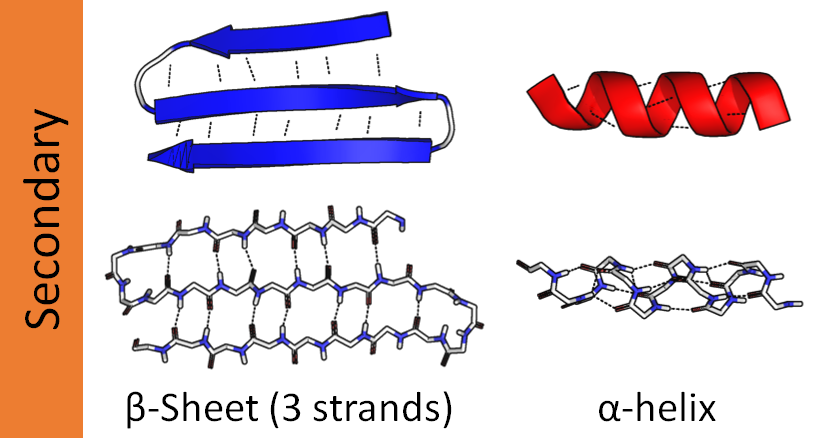

In [50]:
analyzed_seq.secondary_structure_fraction() # helix, turn, sheet

(0.35964912280701755, 0.27192982456140347, 0.3421052631578947)

## **8) ПРОТЕИНОВЫЕ ВЕСЫ**

**Протеиновые весы** – это способ измерения определённых атрибутов остатков по длине последовательности пептидов с помощью "скользящего" окна. Весы градуируются значениями для каждой аминокислоты. Каждое значение базируется на различных физических и химических свойствах, таких как гидрофобность(свойство молекул отталкивать воду), тенденции вторичной структуры и доступность поверхности. В отличие от некоторых единиц измерения на уровне цепочки, таких как общее поведение молекул, весы позволяют более детально понять, как будут вести себя более мелкие участки последовательности.

In [51]:
from Bio.SeqUtils.ProtParam import ProtParamData

Вот некоторые распространённые весы:
- kd → индекс гидрофобности Kyte & Doolittle

- Flex → нормализованные средние параметры гибкости (B-значения)

- hw → индекс гидрофобности Hopp & Wood

- em → поверхностная дробная вероятность Emini (доступность поверхности)

В качестве примера рассмотрим индекс гидрофобности (kd). Представлены весы, в которых каждый остаток имеет связанное значение, представляющее уровень его гидрофобности.

In [52]:
kd = {"A": 1.8, "R": -4.5, "N": -3.5, "D": -3.5, "C": 2.5,
      "Q": -3.5, "E": -3.5, "G": -0.4, "H": -3.2, "I": 4.5,
      "L": 3.8, "K": -3.9, "M": 1.9, "F": 2.8, "P": -1.6,
      "S": -0.8, "T": -0.7, "W": -0.9, "Y": -1.3, "V": 4.2}

Положительные значения означают гидрофобность. Изолейцин (I) и валин (V) наиболее гидрофобны, а аргинин (R) и лизин (K) наиболее гидрофильны. Гидрофобные остатки(не растворяются в воде), как правило, находятся внутри полипептида, а гидрофильные остатки(растворяются в воде) – за его пределами, поэтому эти весы также дают представление о том, как может складываться такой полипептид.
Чтобы провести анализ на основе белковых весов, необходимо задать размер окна, в котором будет вычисляться среднее значение. Используя ключевое слово "edge", можно также измерять важность соседних остатков, в основном определяя их важность по отношению к среднему для окна значению.

In [55]:
analyzed_seq.protein_scale(window=7, param_dict=ProtParamData.kd)[:10]

[-0.10000000000000002,
 -0.1714285714285714,
 -0.5285714285714285,
 0.28571428571428575,
 -0.34285714285714286,
 -0.6142857142857142,
 -1.3714285714285717,
 -0.27142857142857146,
 0.11428571428571413,
 0.028571428571428532]

## **9) ЗАКЛЮЧЕНИЕ**

Давайте объединим все наши методы и создадим скрипт, который выполнит итерацию по каждой цепочке нашей структуры и запустит какой-нибудь стандартный анализ. Создадим пустой контейнер, заполним его словарём ключевой информации для каждой последовательности. После создания такой вложенной структуры мы сможем получать срезы, как и в любом контейнере на Python, отдельных записей.

In [62]:
# Create empty list for chains
all_seqs = []
counter = 1
# For each polypeptide in the structure, run protein analysis methods and store in dict
for pp in polypeptide_bilder.build_peptides(structure):
    seq_info = {} # create an empty dict
    seq = pp.get_sequence() # get the sequence like above
    analyzed_seq = ProteinAnalysis(str(seq)) # needs to be a str
    # Specify dict keys and values
    seq_info['Sequence Number'] = counter # set sequence id
    seq_info['Sequence'] = seq # store BioPython Seq() object
    seq_info['Sequence Length'] = len(seq) # length of seq
    seq_info['Molecular Weight'] = analyzed_seq.molecular_weight()
    seq_info['GRAVY'] = analyzed_seq.gravy() # hydrophobicity
    seq_info['AA Count'] = analyzed_seq.count_amino_acids() # count of each type of amino acid (AA)
    seq_info['AA Percent'] = analyzed_seq.get_amino_acids_percent() # percentage of each type of amino acid (AA)
    # tuple of (helix, turn, sheet)
    seq_info['Secondary Structure'] = \
        analyzed_seq.secondary_structure_fraction()

    # Update all_seqs list and increase counter
    all_seqs.append(seq_info)
    counter += 1

Выбор первой последовательности возвращает словарь с нашими анализами и значениями!

In [59]:
all_seqs[0]

{'Sequence Number': 1,
 'Sequence': Seq('GSPNYDKWEMERTDITMKHKLGGGQYGEVYEGVWKKYSLTVAVKTL'),
 'Sequence Length': 46,
 'Molecular Weight': 5294.966800000002,
 'GRAVY': -0.78695652173913,
 'AA Count': {'A': 1,
  'C': 0,
  'D': 2,
  'E': 4,
  'F': 0,
  'G': 6,
  'H': 1,
  'I': 1,
  'K': 6,
  'L': 3,
  'M': 2,
  'N': 1,
  'P': 1,
  'Q': 1,
  'R': 1,
  'S': 2,
  'T': 4,
  'V': 4,
  'W': 2,
  'Y': 4},
 'AA Percent': {'A': 0.021739130434782608,
  'C': 0.0,
  'D': 0.043478260869565216,
  'E': 0.08695652173913043,
  'F': 0.0,
  'G': 0.13043478260869565,
  'H': 0.021739130434782608,
  'I': 0.021739130434782608,
  'K': 0.13043478260869565,
  'L': 0.06521739130434782,
  'M': 0.043478260869565216,
  'N': 0.021739130434782608,
  'P': 0.021739130434782608,
  'Q': 0.021739130434782608,
  'R': 0.021739130434782608,
  'S': 0.043478260869565216,
  'T': 0.08695652173913043,
  'V': 0.08695652173913043,
  'W': 0.043478260869565216,
  'Y': 0.08695652173913043},
 'Secondary Structure': (0.34782608695652173,
  0

Можно легко выбирать конкретные значения.

In [61]:
print(all_seqs[0]['Sequence'], "\n",\
all_seqs[0]['Molecular Weight'])

GSPNYDKWEMERTDITMKHKLGGGQYGEVYEGVWKKYSLTVAVKTL 
 5294.966800000002
